In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
estate = pd.read_csv('_data.csv')
estate.columns


Index(['Unnamed: 0', 'ID  объявления', 'Количество комнат', 'Тип', 'Метро',
       'Адрес', 'Площадь, м2', 'Дом', 'Парковка', 'Цена', 'Телефоны',
       'Описание', 'Ремонт', 'Площадь комнат, м2', 'Балкон', 'Окна', 'Санузел',
       'Можно с детьми/животными', 'Дополнительно', 'Название ЖК',
       'Серия дома', 'Высота потолков, м', 'Лифт', 'Мусоропровод',
       'Ссылка на объявление'],
      dtype='object')

In [4]:
# Информация о структуре датасета
estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23368 entries, 0 to 23367
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                23368 non-null  int64  
 1   ID  объявления            23368 non-null  int64  
 2   Количество комнат         22327 non-null  object 
 3   Тип                       23368 non-null  object 
 4   Метро                     22053 non-null  object 
 5   Адрес                     23368 non-null  object 
 6   Площадь, м2               23368 non-null  object 
 7   Дом                       23368 non-null  object 
 8   Парковка                  9951 non-null   object 
 9   Цена                      23368 non-null  object 
 10  Телефоны                  23368 non-null  object 
 11  Описание                  23368 non-null  object 
 12  Ремонт                    20613 non-null  object 
 13  Площадь комнат, м2        14458 non-null  object 
 14  Балкон

In [5]:
# Основные статистические характеристики
estate.describe(include='all')

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
count,23368.000000,2.336800e+04,22327,23368,22053,23368,23368,23368,9951,23368,...,16755,20696,17272,23011,5848,2163,11206.00000,17868,12846,23368
unique,NaN,NaN,24,1,5866,12850,11255,2565,5,3922,...,3,20,3,528,1798,393,NaN,34,2,23368
top,NaN,NaN,1,Квартира,м. Академическая (10 мин пешком),"Москва, Чапаевский переулок, 3",40.0/20.0/10.0,"3/5, Кирпичный",наземная,"40000.0 руб./ За месяц, Залог - 40000 руб., Ко...",...,Во двор,Совмещенный (1),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...","Символ, 2019",индивидуальный проект,NaN,Пасс (1),Да,https://www.cian.ru/rent/flat/271271157
freq,NaN,NaN,7917,23368,41,63,224,322,6043,1113,...,10870,10078,10134,2896,61,615,NaN,5911,10897,1
mean,11683.500000,2.676265e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.98345,NaN,NaN,NaN
std,6745.904881,1.876862e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.61472,NaN,NaN,NaN
min,0.000000,1.072986e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.20000,NaN,NaN,NaN
25%,5841.750000,2.712663e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.64000,NaN,NaN,NaN
50%,11683.500000,2.739030e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.64000,NaN,NaN,NaN
75%,17525.250000,2.746872e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.80000,NaN,NaN,NaN


оставляем только москву

In [6]:
estate[estate["Адрес"]. str.contains ("Москва")]


,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.00,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.50,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",...,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",...,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.90,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,23363,215565511,NaN,Квартира,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0/16.4/8.0,10/14,NaN,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",...,NaN,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Мещерский лес,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/215565511
23364,23364,274654844,1,Квартира,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",NaN,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",...,Во двор,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Лучи,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/274654844
23365,23365,268679909,"2, Оба варианта",Квартира,м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",NaN,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",...,На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",NaN,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/268679909
23366,23366,274807525,2,Квартира,м. Солнцево (11 мин пешком),"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5/10.0,"8/23, Монолитный",наземная,"55000.0 руб./ За месяц, Залог - 50000 руб., Ко...",...,Во двор,"Совмещенный (1), Раздельный (1)",NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,2.65,Пасс (3),Да,https://www.cian.ru/rent/flat/274807525


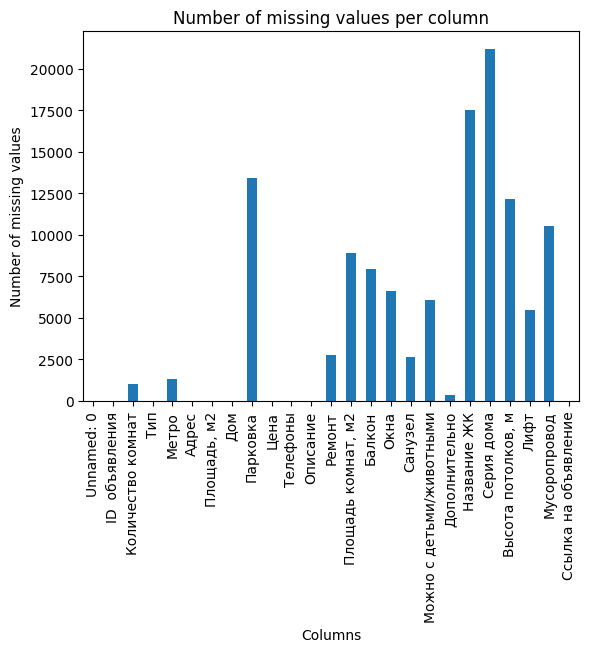

In [7]:
nan_counts = estate.isna().sum()
nan_counts.plot(kind='bar')
plt.title('Number of missing values per column')
plt.xlabel('Columns')
plt.ylabel('Number of missing values')
plt.show()

строк, полностью состоящих из нан не найдено

In [8]:
nan_rows = estate.iloc[:, 3:].isna().all(axis=1)
nan_rows = estate[nan_rows]
nan_rows
#проверка на строки, полностью состоящие из нанов

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление


In [9]:
#замена всех нанов на 'значения отсутствуют', чтобы получить отображение на графике
estate=estate.fillna('значения отсутствуют')


In [10]:
estate=estate[['Unnamed: 0', 'ID  объявления', 'Количество комнат', 'Метро','Адрес',
       'Площадь, м2', 'Дом', 'Парковка', 'Цена', 
       'Описание', 'Ремонт', 'Площадь комнат, м2', 'Балкон', 'Окна', 'Санузел',
       'Можно с детьми/животными', 'Дополнительно', 'Название ЖК',
       'Высота потолков, м', 'Лифт', 'Мусоропровод']]
estate.head()

,Unnamed: 0,ID объявления,Количество комнат,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Описание,...,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,"Высота потолков, м",Лифт,Мусоропровод
0,0,271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Без комиссии для нанимателя! Бонус коллегам 12...,...,значения отсутствуют,значения отсутствуют,значения отсутствуют,значения отсутствуют,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",3.0,"Пасс (4), Груз (1)",Да
1,1,271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,...,25 25 20 25,значения отсутствуют,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,3.5,"Пасс (1), Груз (1)",Нет
2,2,271173086,"4, Оба варианта",м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",...,значения отсутствуют,значения отсутствуют,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,3.2,Пасс (1),значения отсутствуют
3,3,272197456,"4, Оба варианта",м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",ID 31618: Эксклюзивное предложение. Современн...,...,14-42-20-19,значения отсутствуют,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",значения отсутствуют,3.2,Пасс (1),значения отсутствуют
4,4,273614615,2,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",значения отсутствуют,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,...,20 18,значения отсутствуют,На улицу и двор,Совмещенный (2),значения отсутствуют,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,3.9,"Пасс (1), Груз (1)",Да


In [11]:
#сюда добавить индексацию с удалением unknown

здесь мы объясняем, почему избавились от некоторых столбцов

/var/folders/3s/rdvrmt197r3gwxd1l18vb22m0000gn/T/ipykernel_24062/3396369576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rooms['Количество комнат']=rooms['Количество комнат'].fillna('значения отсутствуют')


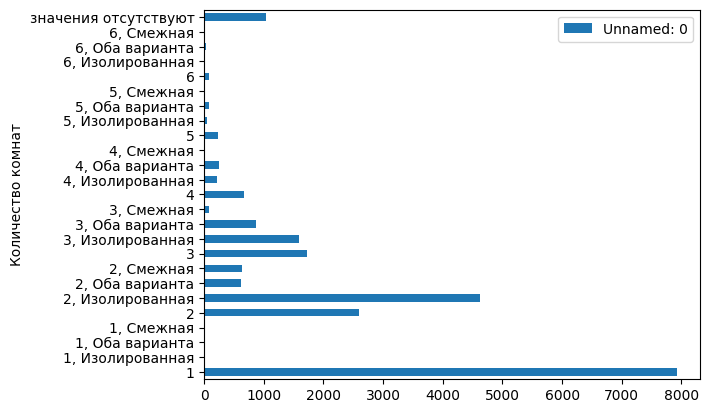

In [12]:
rooms=estate[['Unnamed: 0','Количество комнат']]
rooms['Количество комнат']=rooms['Количество комнат'].fillna('значения отсутствуют')
uniq_rooms=rooms.groupby('Количество комнат').count()
uniq_rooms.plot(kind='barh')
plt.show()


глядя на график, мы понимаем, что в столбце кол-во комнат можем использовать доп разделение

In [13]:


estate[['Количество комнат (число)', 'Описание комнат']] = estate['Количество комнат'].str.split(',', n=1, expand=True).apply(lambda x: x.str.strip())
estate.head()

,Unnamed: 0,ID объявления,Количество комнат,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Описание,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,"Высота потолков, м",Лифт,Мусоропровод,Количество комнат (число),Описание комнат
0,0,271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Без комиссии для нанимателя! Бонус коллегам 12...,...,значения отсутствуют,значения отсутствуют,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",3.0,"Пасс (4), Груз (1)",Да,4,None
1,1,271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,3.5,"Пасс (1), Груз (1)",Нет,4,None
2,2,271173086,"4, Оба варианта",м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",...,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,3.2,Пасс (1),значения отсутствуют,4,Оба варианта
3,3,272197456,"4, Оба варианта",м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",ID 31618: Эксклюзивное предложение. Современн...,...,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",значения отсутствуют,3.2,Пасс (1),значения отсутствуют,4,Оба варианта
4,4,273614615,2,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",значения отсутствуют,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,...,На улицу и двор,Совмещенный (2),значения отсутствуют,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,3.9,"Пасс (1), Груз (1)",Да,2,None


In [16]:
unique_values = estate['Парковка'].unique()
len(unique_values)

6

изучим данные по парковке

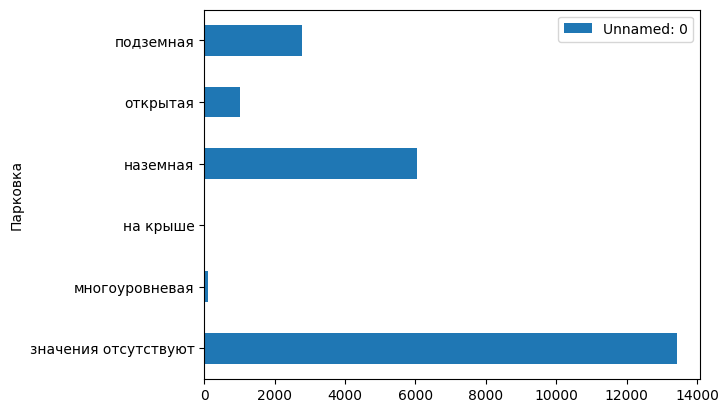

In [17]:
parking=estate[['Unnamed: 0','Парковка']]
uniq_parking=parking.groupby('Парковка').count()
uniq_parking.plot(kind='barh')
plt.show()

большая часть строк в столбце без данных, но поскольку парковка при аренде большое преимущество, данный столбец оставляем

далее мы изучили столбец с данными по дому и решили разбить его на составляющие

In [18]:

estate[['этажность','тип дома']]=estate['Дом'].str.split(',', expand=True)
estate['этаж']=estate['этажность'].str.split('/').str[0]
estate['этажность']=estate['этажность'].str.split('/').str[-1]
estate=estate.fillna('значения отсутствуют')
unique_values = estate['этаж'].unique()
estate.head()


,Unnamed: 0,ID объявления,Количество комнат,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Описание,...,Дополнительно,Название ЖК,"Высота потолков, м",Лифт,Мусоропровод,Количество комнат (число),Описание комнат,этажность,тип дома,этаж
0,0,271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Без комиссии для нанимателя! Бонус коллегам 12...,...,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",3.0,"Пасс (4), Груз (1)",Да,4,значения отсутствуют,16,Монолитный,5
1,1,271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,...,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,3.5,"Пасс (1), Груз (1)",Нет,4,значения отсутствуют,16,Монолитно-кирпичный,5
2,2,271173086,"4, Оба варианта",м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",...,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,3.2,Пасс (1),значения отсутствуют,4,Оба варианта,16,значения отсутствуют,5
3,3,272197456,"4, Оба варианта",м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",ID 31618: Эксклюзивное предложение. Современн...,...,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",значения отсутствуют,3.2,Пасс (1),значения отсутствуют,4,Оба варианта,6,значения отсутствуют,5
4,4,273614615,2,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",значения отсутствуют,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,...,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,3.9,"Пасс (1), Груз (1)",Да,2,значения отсутствуют,26,Панельный,12


на графике ниже видно, что тип дома указывается нечасто, поэтому им можно пренебречь

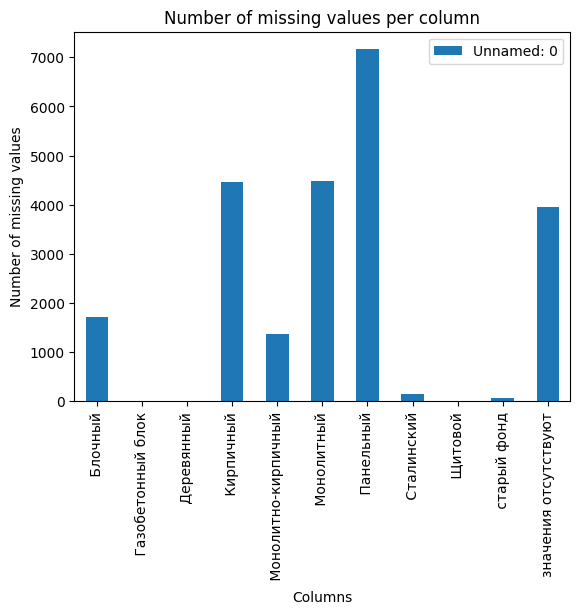

In [19]:
house=estate[['Unnamed: 0','тип дома']]

type_house=house.groupby('тип дома').count()
type_house.plot(kind='bar')
plt.title('Number of missing values per column')
plt.xlabel('Columns')
plt.ylabel('Number of missing values')
plt.show()

In [20]:
house2=estate[['Unnamed: 0','Площадь, м2']]
# house[['этажность','тип дома']]=house['Дом'].str.split(',', expand=True)
house2['Площадь, м2']=house2['Площадь, м2'].str.split('/').str[0]
# house['Площадь, м2'].plot(kind='bar')
house2.head()

/var/folders/3s/rdvrmt197r3gwxd1l18vb22m0000gn/T/ipykernel_24062/3788179725.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house2['Площадь, м2']=house2['Площадь, м2'].str.split('/').str[0]


,Unnamed: 0,"Площадь, м2"
0,0,200.0
1,1,198.0
2,2,200.0
3,3,170.0
4,4,58.0


In [21]:
# здесь мы еше убрали питер
#metro=estate[['Unnamed: 0','Метро']]
metro=estate[estate["Адрес"]. str.contains ("Москва")][['Unnamed: 0','Метро']]
metro[['название станции', 'удаленность']] = metro['Метро'].str.split('(', expand=True)
metro['удаленность'] = metro['удаленность'].str.replace(r'\)$', '')
metro[['минуты', 'тип_транспорта']] = metro['удаленность'].str.split(" мин ", expand=True)

stations=metro['название станции'].unique()
print(stations)


['м. Смоленская ' 'м. Арбатская ' 'м. Кропоткинская '
 'м. Александровский сад ' 'м. Киевская ' 'м. Библиотека им. Ленина '
 'м. Боровицкая ' 'м. Баррикадная ' 'м. Краснопресненская '
 'значения отсутствуют' 'м. Марк ' 'м. Алтуфьево ' 'м. Новодачная '
 'м. Долгопрудная ' 'м. Ховрино ' 'м. Селигерская ' 'м. Лианозово '
 'м. Достоевская ' 'м. Кузнецкий мост ' 'м. Сухаревская '
 'м. Проспект Мира ' 'м. Цветной бульвар ' 'м. Трубная '
 'м. Комсомольская ' 'м. Рижская ' 'м. Сретенский бульвар '
 'м. Тургеневская ' 'м. Марьина роща ' 'м. Коломенская ' 'м. Кожуховская '
 'м. Депо ' 'м. Технопарк ' 'м. Печатники ' 'м. Ленинский проспект '
 'м. Автозаводская ' 'м. Пражская ' 'м. Алма-Атинская '
 'м. Улица Академика Янгеля ' 'м. Зябликово ' 'м. Царицыно '
 'м. Тульская ' 'м. Шипиловская ' 'м. Кантемировская ' 'м. Орехово '
 'м. Дубровка ' 'м. ЗИЛ ' 'м. Чертановская ' 'м. Каховская '
 'м. Павелецкая ' 'м. Нагорная ' 'м. Нахимовский проспект '
 'м. Каширская ' 'м. Крымская ' 'м. Верхние котлы '
 '

/var/folders/3s/rdvrmt197r3gwxd1l18vb22m0000gn/T/ipykernel_24062/3760869528.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  metro['удаленность'] = metro['удаленность'].str.replace(r'\)$', '')


In [22]:
#Исследую столбец с ценами
estate['Цена'].nunique()

3922

In [23]:
a=(str(estate.loc[0,['Цена']]))
print(a)
#Тут видно, что нужно делить на разные колонки или как минимум оставить стоимость за месяц

Цена    500000.0 руб./ За месяц, Залог - 500000 руб., ...
Name: 0, dtype: object


In [26]:
price=estate[['Unnamed: 0','Цена']] 
price['Цена за месяц']=price['Цена'].str.split('руб.', expand=True)[0] 
#new_df = new_df.astype({np.float})
price.head()
# sns.histplot(x='Цена за месяц', data=new_df)

#Улюм, ты ничего не видел! Комментарий для Саши и Вероники: тупо выделила оплату за месяц, нашла еще как отдельно в строке забрать цифры, 
# но не понимаю, чем пригодится нам залог и срок сдачи в аренду (там тем более не цифры)
# Может пригодится: https://younglinux.info/python/task/filter-integer


/var/folders/3s/rdvrmt197r3gwxd1l18vb22m0000gn/T/ipykernel_24062/594445359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price['Цена за месяц']=price['Цена'].str.split('руб.', expand=True)[0]


,Unnamed: 0,Цена,Цена за месяц
0,0,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",500000.0
1,1,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",500000.0
2,2,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",500000.0
3,3,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",400000.0
4,4,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",225000.0


In [27]:
price.describe(include='all')
#походу строки остались, не перевели еще в числа

,Unnamed: 0,Цена,Цена за месяц
count,23368.000000,23368,23368
unique,NaN,3922,611
top,NaN,"40000.0 руб./ За месяц, Залог - 40000 руб., Ко...",40000.0
freq,NaN,1113,1555
mean,11683.500000,NaN,NaN
std,6745.904881,NaN,NaN
min,0.000000,NaN,NaN
25%,5841.750000,NaN,NaN
50%,11683.500000,NaN,NaN
75%,17525.250000,NaN,NaN


In [28]:
#Исследую столбец с ремонтом
estate['Ремонт'].nunique()

5

<Axes: xlabel='Ремонт', ylabel='Count'>

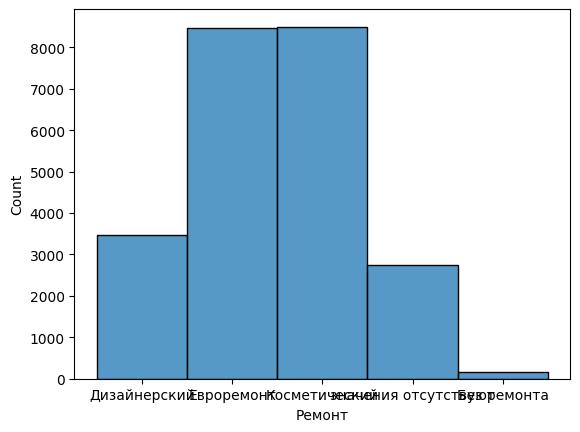

In [29]:
# Типов ремонта всего 4, так что для наглядности построим гистограмму
sns.histplot(x='Ремонт', data=estate)

In [30]:
#Исследую столбец с площадью комнат
estate['Площадь комнат, м2'].nunique()

3991

In [31]:
#  посмотрим какая информация в этом столбце:
b=(str(estate.loc[0:10,['Площадь комнат, м2', 'Площадь, м2']]))
print(b)
#Опачки, а сумма площадей комнат - это второе число сразу после слеша в колонке площадь, только полюбуйтесь:

      Площадь комнат, м2       Площадь, м2
0   значения отсутствуют        200.0/20.0
1            25 25 20 25   198.0/95.0/18.0
2   значения отсутствуют   200.0/116.0/4.0
3            14-42-20-19   170.0/95.0/17.0
4                  20 18     58.0/38.0/5.0
5   значения отсутствуют              92.0
6         43-25-25-25-22  213.0/140.0/20.0
7               26 22 15     98.0/63.0/9.0
8               45 25 25   120.0/95.0/10.0
9            16 14 16 20    90.0/66.0/10.0
10           16-40-20-18   170.0/94.0/10.0


In [32]:
#Исследую столбец с балконами
estate['Балкон'].nunique()

19

<Axes: >

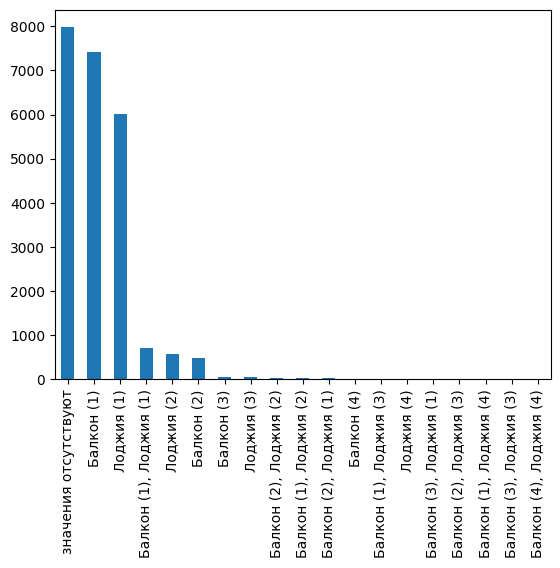

In [33]:
#Интересно, 18 типов балконов? Поглядим на это безобразие

# sns.histplot(x='Балкон', data=estate) уродство, попробую иначе:
Balcony = estate['Балкон'].value_counts()
Balcony.plot.bar()
# Предполагаю, что можем заменить просто на наличие, поставим числа 1 и 0: есть балконы/лоджии в принципе или нет

In [34]:
#Исследую столбец с окнами
estate['Окна'].nunique()

4

<Axes: xlabel='Окна', ylabel='Count'>

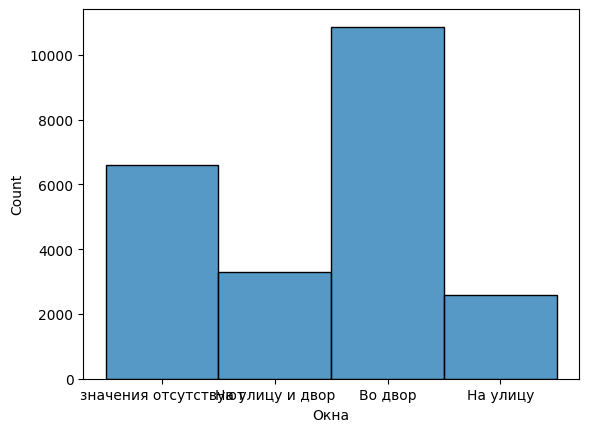

In [35]:
sns.histplot(x='Окна', data=estate)
# тут видим, что окна выходят в основном во двор, можно красиую круговую диаграмму сделать еще

(<Axes: >,
 array([10078,  7158,  2672,  1437,   812,   534,   241,   188,    77,
           52,    30,    27,    25,    15,     6,     4,     2,     1]),
 array(['значения отсутствуют', 'Совмещенный (2), Раздельный (1)',
        'Совмещенный (3)', 'Совмещенный (2)',
        'Совмещенный (1), Раздельный (1)', 'Совмещенный (1)',
        'Совмещенный (2), Раздельный (2)', 'Раздельный (2)',
        'Раздельный (1)', 'Раздельный (3)', 'Совмещенный (4)',
        'Совмещенный (3), Раздельный (1)', 'Раздельный (4)',
        'Совмещенный (1), Раздельный (2)',
        'Совмещенный (2), Раздельный (4)',
        'Совмещенный (1), Раздельный (3)',
        'Совмещенный (3), Раздельный (3)',
        'Совмещенный (4), Раздельный (2)',
        'Совмещенный (2), Раздельный (3)',
        'Совмещенный (4), Раздельный (1)',
        'Совмещенный (3), Раздельный (2)'], dtype=object))

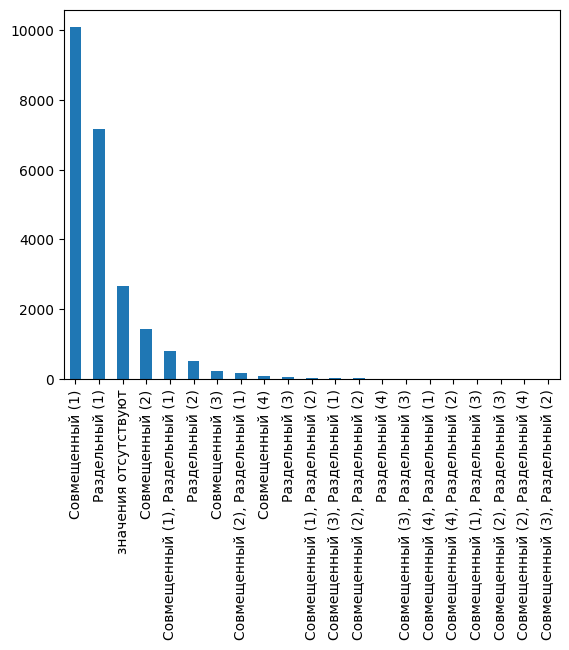

In [36]:
#Исследуем санузлы
bathroom = estate['Санузел'].value_counts()
bathroom.plot.bar(), bathroom.unique(), estate['Санузел'].unique()

(<Axes: >,
 array([10134,  6899,  6096,   239]),
 array(['Можно с детьми, Можно с животными', 'Можно с детьми',
        'Можно с животными', 'значения отсутствуют'], dtype=object))

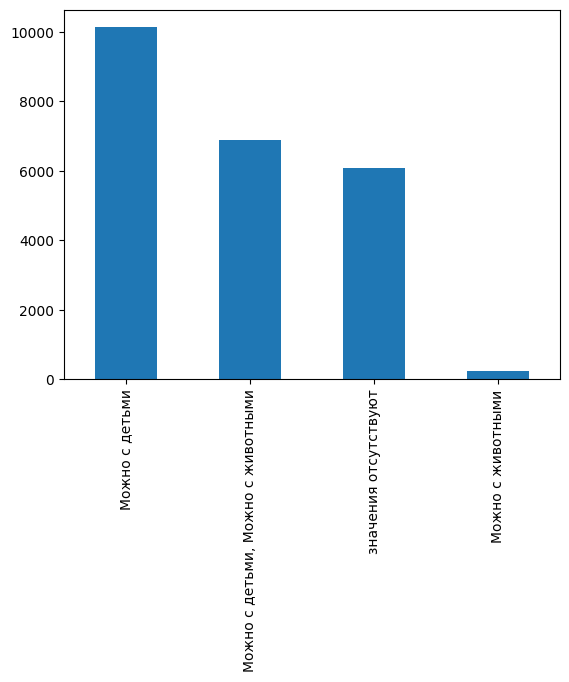

In [37]:
possible_children_animals = estate['Можно с детьми/животными'].value_counts()
possible_children_animals.plot.bar(), possible_children_animals.unique(), estate['Можно с детьми/животными'].unique()

(<Axes: >,
 array([5911, 5500, 4326, 3962, 1224,  654,  636,  346,  187,  185,   95,
          65,   64,   45,   44,   28,   25,   20,   15,    7,    6,    3,
           2,    1]),
 array(['Пасс (4), Груз (1)', 'Пасс (1), Груз (1)', 'Пасс (1)',
        'значения отсутствуют', 'Пасс (3)', 'Пасс (4)',
        'Пасс (2), Груз (1)', 'Пасс (2)', 'Пасс (2), Груз (2)',
        'Пасс (3), Груз (3)', 'Груз (4)', 'Пасс (3), Груз (1)', 'Груз (1)',
        'Пасс (1), Груз (2)', 'Груз (2)', 'Пасс (3), Груз (2)',
        'Пасс (4), Груз (4)', 'Пасс (2), Груз (3)', 'Пасс (4), Груз (2)',
        'Груз (3)', 'Пасс (1), Груз (3)', 'Пасс (4), Груз (3)',
        'Пасс (5), Груз (1)', 'Пасс (1), Груз (12)', 'Пасс (60)',
        'Пасс (6)', 'Пасс (8), Груз (8)', 'Пасс (7)', 'Пасс (1), Груз (4)',
        'Пасс (50)', 'Пасс (5), Груз (3)', 'Пасс (2), Груз (4)',
        'Груз (6)', 'Груз (8)', 'Пасс (5)'], dtype=object))

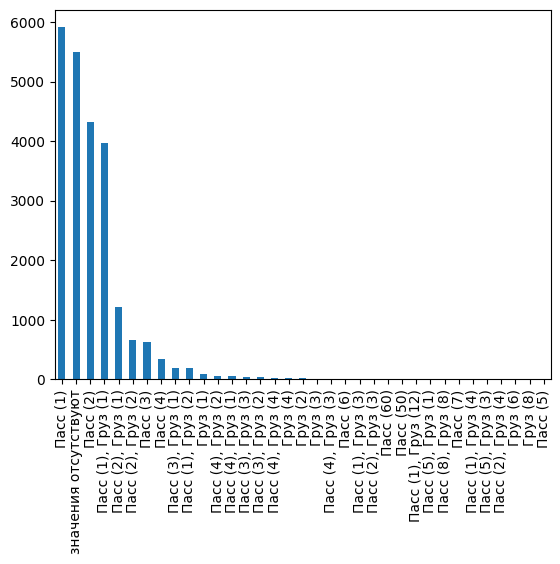

In [38]:
elevator = estate['Лифт'].value_counts()
elevator.plot.bar(), elevator.unique(), estate['Лифт'].unique()

In [39]:
estate['Лифт'].isna().sum()

0

(<Axes: >,
 array([10897, 10522,  1949]),
 array(['Да', 'Нет', 'значения отсутствуют'], dtype=object))

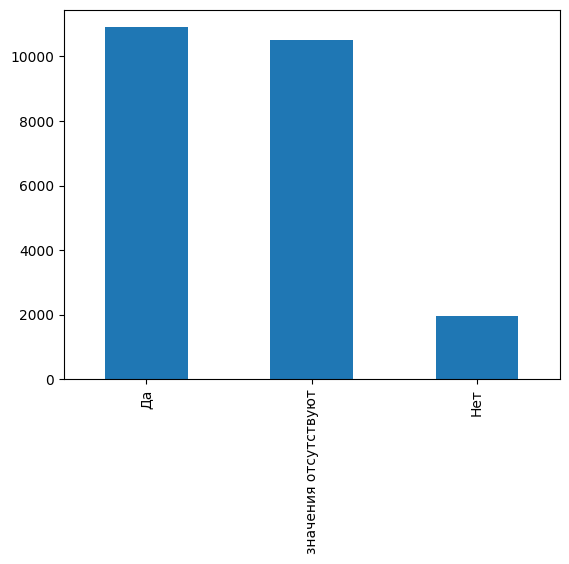

In [40]:
garbage = estate['Мусоропровод'].value_counts()
garbage.plot.bar(), garbage.unique(), estate['Мусоропровод'].unique()

In [41]:
estate['Мусоропровод'].isna().sum()

0

In [42]:
additionally = estate['Дополнительно'].str.split(',', expand=True)
additionally

,0,1,2,3,4,5,6,7,8,9,10
0,Мебель в комнатах,Мебель на кухне,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,Телефон
1,Мебель в комнатах,Мебель на кухне,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,None
2,Мебель в комнатах,Мебель на кухне,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,Телефон
3,Мебель в комнатах,Мебель на кухне,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,Телефон
4,Мебель в комнатах,Мебель на кухне,Ванна,Душевая кабина,Стиральная машина,Посудомоечная машина,Телевизор,Холодильник,Интернет,None,None
...,...,...,...,...,...,...,...,...,...,...,...
23363,Мебель в комнатах,Мебель на кухне,Ванна,Стиральная машина,Кондиционер,Холодильник,Интернет,None,None,None,None
23364,Мебель в комнатах,Мебель на кухне,Ванна,Стиральная машина,Телевизор,Холодильник,None,None,None,None,None
23365,Мебель на кухне,Душевая кабина,Стиральная машина,Кондиционер,Холодильник,Интернет,None,None,None,None,None
23366,Мебель в комнатах,Мебель на кухне,Ванна,Стиральная машина,Кондиционер,Посудомоечная машина,Холодильник,None,None,None,None
